In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("suv_data.csv")
df.shape

(400, 5)

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

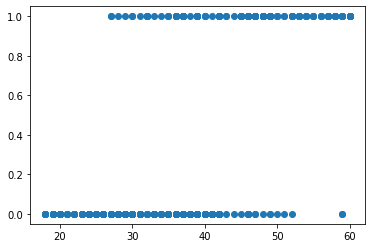

In [6]:
plt.scatter(df['Age'],df['Purchased'])

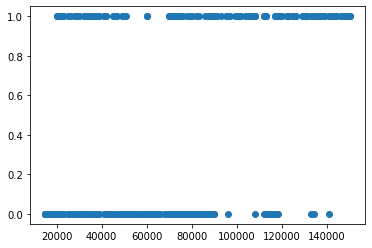

In [7]:
plt.scatter(df['EstimatedSalary'],df['Purchased'])

C:\Users\USER\AppData\Local\Temp\ipykernel_14480\3454930901.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  axes = Axes3D(fig)


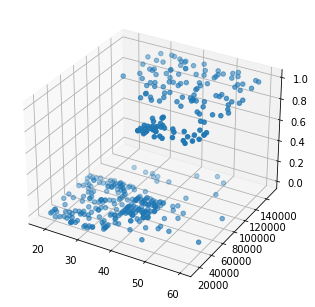

In [9]:
fig = plt.figure()
axes = Axes3D(fig)
axes.scatter(df['Age'],df['EstimatedSalary'],df['Purchased'])
plt.show()

<AxesSubplot:>

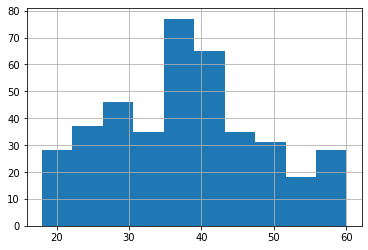

In [11]:
df['Age'].hist()

<AxesSubplot:>

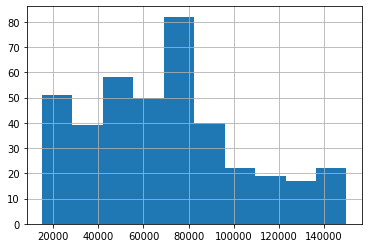

In [12]:
df["EstimatedSalary"].hist()

<AxesSubplot:xlabel='Purchased', ylabel='Age'>

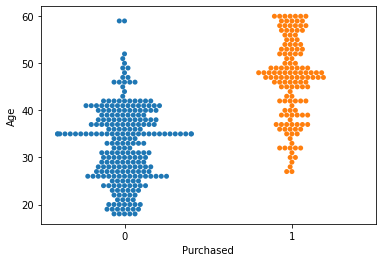

In [13]:
sns.swarmplot(y='Age',x='Purchased',data=df)

<AxesSubplot:xlabel='Purchased', ylabel='EstimatedSalary'>

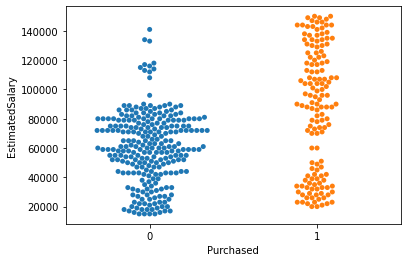

In [14]:
sns.swarmplot(y='EstimatedSalary',x='Purchased',data=df)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

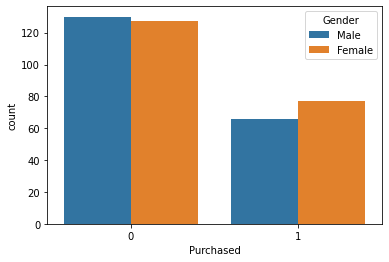

In [15]:
sns.countplot(x='Purchased',hue='Gender',data=df)

In [18]:
x = df.iloc[:,[2,3]].values
y = df.iloc[:,4].values

In [20]:
print(x[:5],y[:5])

[[   19 19000]
 [   35 20000]
 [   26 43000]
 [   27 57000]
 [   19 76000]] [0 0 0 0 0]


In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [23]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [25]:
prediction = model.predict(x_test)
prediction[:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [26]:
test = np.array([[20,200000]]).astype(float)
test = sc.transform(test)
test

array([[-1.69855317,  3.85690794]])

In [27]:
test_prediction = model.predict(test)
test_prediction

array([0], dtype=int64)

In [28]:
accuracy = accuracy_score(y_test,prediction)
print(accuracy*100)

85.0


In [29]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction)
cm

array([[63,  4],
       [11, 22]], dtype=int64)